## I. IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import gdown

In [2]:
file_id = '1hGktcxiDORsWRpRn_9op4CnFVbXvAsM9'
url = f'https://drive.google.com/uc?id={file_id}'
output = 'creditcard.csv'

gdown.download(url, output, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1hGktcxiDORsWRpRn_9op4CnFVbXvAsM9
From (redirected): https://drive.google.com/uc?id=1hGktcxiDORsWRpRn_9op4CnFVbXvAsM9&confirm=t&uuid=95d61a15-24b3-4d70-9c0d-61e53c1afa27
To: /content/creditcard.csv
100%|██████████| 151M/151M [00:02<00:00, 64.6MB/s]


'creditcard.csv'

In [3]:
np.random.seed(2)

In [4]:
data = pd.read_csv('creditcard.csv')

## II. DATA EXPLORATION AND PREPROCESSING

In [5]:
data.head(8)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0


In [6]:
data.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [7]:
data.dropna(inplace=True)

In [8]:
# Preprocessing
from sklearn.preprocessing import StandardScaler

In [9]:
data['normalizedAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))
data = data.drop(['Amount'], axis = 1)

In [10]:
data = data.drop(['Time'], axis = 1)
data.head(8)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizedAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403
5,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,0,-0.338556
6,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,0,-0.333279
7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,0,-0.190107


In [11]:
X = data.iloc[:, data.columns != 'Class']
y = data.iloc[:, data.columns == 'Class']

In [12]:
print(y)

        Class
0           0
1           0
2           0
3           0
4           0
...       ...
284802      0
284803      0
284804      0
284805      0
284806      0

[284807 rows x 1 columns]


In [13]:
# Splitting the data
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [15]:
print(X_train.shape)

(199364, 29)


In [16]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

## III. DEEP LEARNING

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [18]:
model = Sequential([
    Dense(units=16, input_dim=29, activation='relu'),
    Dense(units=24,activation='relu'),
    Dropout(0.3),
    Dense(units=32,activation='relu'),
    Dense(units=24,activation='relu'),
    Dense(units=12,activation='relu'),
    Dense(units=1,activation='sigmoid'),
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 24)             │           408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │           800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 24)             │           792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 12)             │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            13 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,793 (10.91 KB)

 Trainable params: 2,793 (10.91 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
## Training
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size = 15, epochs = 5)

Epoch 1/5
13291/13291 ━━━━━━━━━━━━━━━━━━━━ 59s 4ms/step - accuracy: 0.9941 - loss: 0.0256
Epoch 2/5
13291/13291 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - accuracy: 0.9994 - loss: 0.0033
Epoch 3/5
13291/13291 ━━━━━━━━━━━━━━━━━━━━ 42s 3ms/step - accuracy: 0.9994 - loss: 0.0030
Epoch 4/5
13291/13291 ━━━━━━━━━━━━━━━━━━━━ 49s 4ms/step - accuracy: 0.9993 - loss: 0.0032
Epoch 5/5
13291/13291 ━━━━━━━━━━━━━━━━━━━━ 42s 3ms/step - accuracy: 0.9993 - loss: 0.0031


In [21]:
score = model.evaluate(X_test, y_test)

2671/2671 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9993 - loss: 0.0034


In [22]:
print(score)

[0.0035970143508166075, 0.9994031190872192]


In [23]:
# Make a prediction
y_pred = model.predict(X_test)

2671/2671 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


In [24]:
y_pred_labels = (y_pred > 0.5).astype(int)

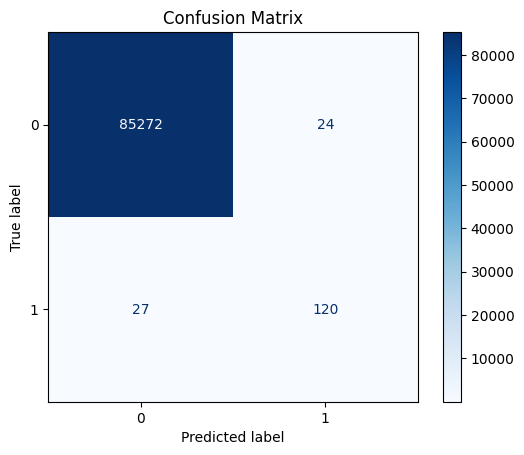

In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_labels)

# Plot using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [26]:
# Evaluation
from sklearn.metrics import recall_score, precision_score, f1_score

In [27]:
rec = recall_score(y_test, y_pred_labels)
prec = precision_score(y_test, y_pred_labels)
f1 = f1_score(y_test, y_pred_labels)

In [28]:
print('Recall score: ', rec)
print('Precision score: ', prec)
print('F1 score: ', f1)

Recall score:  0.8163265306122449
Precision score:  0.8333333333333334
F1 score:  0.8247422680412371


## IV. RandomForest

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [31]:
def calculate_scores(y_true, y_pred):
    recall = recall_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return recall, precision, f1

In [32]:
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.show()

In [33]:
rf_rec, rf_pre, rf_f1 = calculate_scores(y_test, y_pred)

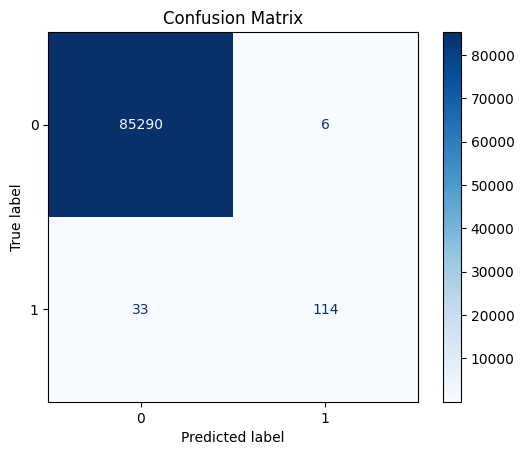

In [34]:
plot_confusion_matrix(y_test, y_pred)

## V. DecisionTree

In [35]:
# DecisionTree
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

In [36]:
dt_rec, dt_pre, dt_f1 = calculate_scores(y_test, y_pred)

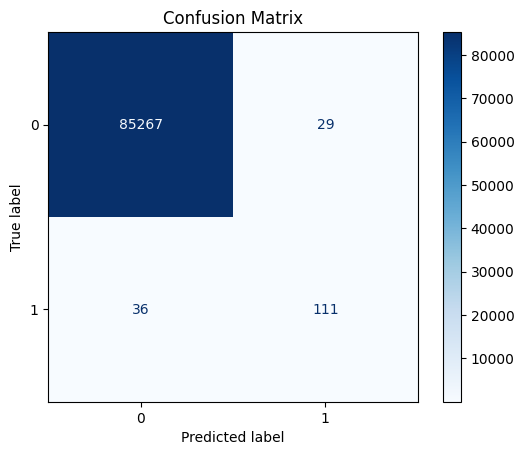

In [37]:
plot_confusion_matrix(y_test, y_pred)

In [38]:
print('Dt recall', dt_rec)
print('Dt precision', dt_pre)
print('Dt f1', dt_f1)

Dt recall 0.7551020408163265
Dt precision 0.7928571428571428
Dt f1 0.7735191637630662


## VI. UNDERSAMPLING

In [39]:
fraud_indices = np.array(data[data.Class == 1].index)
num_records_fraud = len(fraud_indices)
print(num_records_fraud)

492


In [40]:
normal_indices = np.array(data[data.Class == 0].index)

In [41]:
random_normal_indices = np.random.choice(normal_indices, num_records_fraud, replace = False)
random_normal_indices = np.array(random_normal_indices)
print(len(random_normal_indices))

492


In [42]:
under_sample_indices = np.concatenate([fraud_indices, random_normal_indices])
print(len(under_sample_indices))

984


In [43]:
under_sample_data = data.iloc[under_sample_indices,:]

In [44]:
x_undersample = under_sample_data.iloc[:, under_sample_data.columns != 'Class']
y_undersample = under_sample_data.iloc[:, under_sample_data.columns == 'Class']

In [45]:
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(x_undersample, y_undersample, test_size = 0.3, random_state = 0)

In [46]:
y_train_under.value_counts()

,count
Class,
1,345
0,343


In [47]:
model.fit(X_train_under, y_train_under, batch_size = 15, epochs = 5)

Epoch 1/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9351 - loss: 0.2712
Epoch 2/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9605 - loss: 0.0955
Epoch 3/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9632 - loss: 0.0961
Epoch 4/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9484 - loss: 0.1054
Epoch 5/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9602 - loss: 0.0852


In [48]:
model.evaluate(X_test_under, y_test_under)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9511 - loss: 0.1506 


[0.13794450461864471, 0.9459459185600281]

In [49]:
y_pred = model.predict(X_test_under)
y_pred_labels = (y_pred > 0.5).astype(int)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [50]:
rec, prec, f1 = calculate_scores(y_test_under, y_pred_labels)
print('Recall score: ', rec)
print('Precision score: ', prec)
print('F1 score: ', f1)

Recall score:  0.9183673469387755
Precision score:  0.9712230215827338
F1 score:  0.9440559440559441


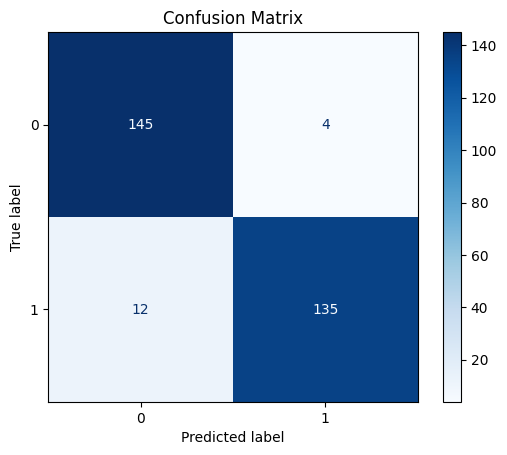

In [51]:
plot_confusion_matrix(y_test_under, y_pred_labels)